# Length-$f_o$ relationship

## References

1. R. W. Chan, M. Fu, L. Young, and N. Tirunagari, “Relative Contributions of Collagen and Elastin to Elasticity of the Vocal Fold Under Tension,” Ann Biomed Eng, vol. 35, no. 8, pp. 1471–1483, Jul. 2007, doi: 10.1007/s10439-007-9314-x.
2. I. Titze, T. Riede, and T. Mau, “Predicting achievable fundamental frequency ranges in vocalization across species,” PLoS Comput. Biol., vol. 12, no. 6, p. e1004907, Jun. 2016, doi: 10.1371/journal.pcbi.1004907.
3. Y. B. Min, I. R. Titze, and F. Alipour-Haghighi, “Stress-Strain Response of the Human Vocal Ligament,” Ann Otol Rhinol Laryngol, vol. 104, no. 7, pp. 563–569, Jul. 1995, doi: 10.1177/000348949510400711.
4. T. Riede, S. Lingle, E. J. Hunter, and I. R. Titze, “Cervids with different vocal behavior demonstrate different viscoelastic properties of their vocal folds,” Journal of Morphology, vol. 271, no. 1, pp. 1–11, 2010, doi: 10.1002/jmor.10774.


In a string fixed at both ends and under tension, the fundamental frequency $f_o$ of the dominant mode of vibration is
$$
f_o = \frac{1}{2L}\sqrt{\frac{\mu^\prime}{\rho}}
$$
where 
- $L$ - length of the strings in m
- $\mu^\prime$ - combined shear and tensile stress (in kPa?) for vibrational displacement, transverse to the string
- $\rho$ - tissue density (1.04 g/cm³)

The stress $\mu^\prime$ could be modeled at two strain levels:

$$
\mu^\prime = \begin{cases}
a ϵ + b & \text{for $0 < ϵ \le ϵ_0$} \\
A ϵ e^{B ϵ} & \text{for $ϵ > ϵ_0$} \\
\end{cases}
$$

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import ceil, log2
from scipy.signal import get_window

from simvoice.constants import fs, male_vf_params, female_vf_params, rho_tis
from simvoice.components.KinematicVocalFolds import fo_to_L

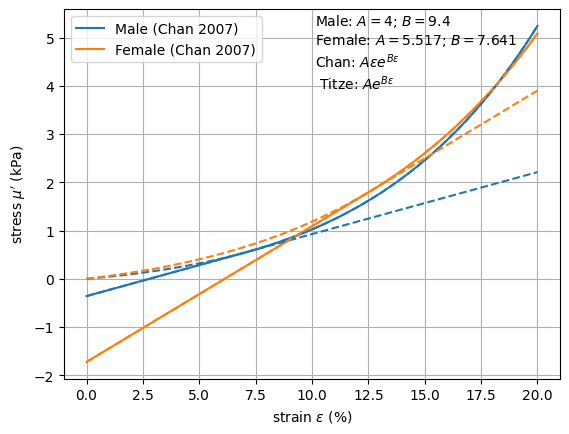

In [3]:
A, B = male_vf_params["fo2L"]
a, b, eps0 = 11.66, -0.1384, 0.07026
eps0 = 0.07026
a = A * np.exp(B * eps0) * (B * eps0 + 1)
b = A * eps0 * np.exp(B * eps0) - a * eps0

Af, Bf = 5.517, 7.641  # female_vf_params["fo2L"]
af, bf, eps0f = 14.04, 0.7179, 0.1253
af = Af * np.exp(Bf * eps0f) * (Bf * eps0f + 1)
bf = Af * eps0f * np.exp(Bf * eps0f) - af * eps0f

eps_to_mu_chan_hi = lambda eps, A, B: A * eps * np.exp(B * eps)

eps_to_mu_chan_lo = lambda eps, a, b: a * eps + b
eps_to_mu_riede = lambda eps, A, B: A * np.exp(B * eps)


def eps_to_mu_chan(eps, A, B, a, b, eps0):
    tf = eps < eps0
    x = np.empty_like(eps)
    x[tf] = eps_to_mu_chan_lo(eps[tf], a, b)
    x[~tf] = eps_to_mu_chan_hi(eps[~tf], A, B)
    return x


eps = np.linspace(0, 0.2, 101)

plt.plot(eps * 100, eps_to_mu_chan(eps, A, B, a, b, eps0), label="Male (Chan 2007)")
plt.plot(
    eps * 100,
    eps_to_mu_chan(eps, Af, Bf, af, bf, eps0f),
    c="C1",
    label="Female (Chan 2007)",
)

plt.plot(eps * 100, eps_to_mu_chan_hi(eps, A, B), "--", c="C0")
plt.plot(eps * 100, eps_to_mu_chan_lo(eps, a, b), "--", c="C0")
plt.plot(eps * 100, eps_to_mu_chan_hi(eps, Af, Bf), "--", c="C1")
plt.plot(eps * 100, eps_to_mu_chan_lo(eps, af, bf), "--", c="C1")
plt.legend()

plt.xlabel("strain $\epsilon$ (%)")

plt.ylabel("stress $\mu^\prime$ (kPa)")
plt.annotate(
    f"Male: $A={A}$; $B={B}$\nFemale: $A={Af}$; $B={Bf}$\nChan: $A \epsilon e^{{B \\epsilon}}$\n Titze: $A e^{{B \\epsilon}}$",
    (0.5, 1),
    (2, -2),
    "axes fraction",
    "offset points",
    va="top",
)
# plt.ylim((-10, 10))
plt.grid()

C:\Users\Takeshi Ikuma\AppData\Local\Temp\ipykernel_17164\2157097549.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu_to_fo = lambda mu, L: np.sqrt(mu / rho_tis) / (2 * L)


(0.0, 400.0)

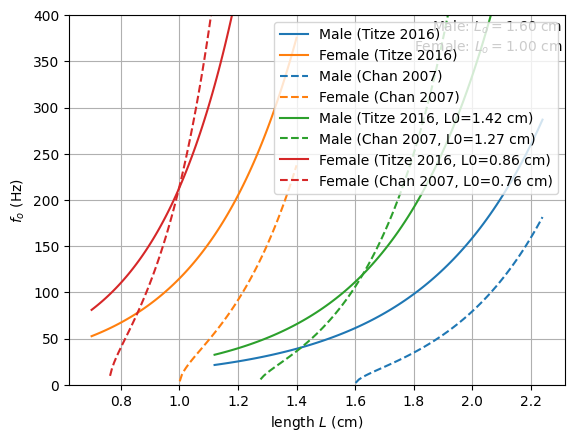

In [64]:
L0 = male_vf_params["L0"] * 1e-2
L0f = female_vf_params["L0"] * 1e-2

L_to_eps = lambda L, L0: (L - L0) / L0
mu_to_fo = lambda mu, L: np.sqrt(mu / rho_tis) / (2 * L)

# L0 = 0.9 * L0
# L0f = 0.7 * L0f
Lm = np.linspace(0.7 * L0, 1.4 * L0, 101)
Lf = np.linspace(0.7 * L0f, 1.4 * L0f, 101)
L0m1 = 0.0142
L0m2 = 0.0127
L0f1 = 0.0086
L0f2 = 0.0076
fom = mu_to_fo(eps_to_mu_chan(L_to_eps(Lm, L0), A, B), Lm)
fof = mu_to_fo(eps_to_mu_chan(L_to_eps(Lf, L0f), Af, Bf), Lf)
fom1 = mu_to_fo(eps_to_mu_riede(L_to_eps(Lm, L0), A, B), Lm)
fof1 = mu_to_fo(eps_to_mu_riede(L_to_eps(Lf, L0f), Af, Bf), Lf)
fom2 = mu_to_fo(eps_to_mu_riede(L_to_eps(Lm, L0m1), A, B), Lm)
fom3 = mu_to_fo(eps_to_mu_chan(L_to_eps(Lm, L0m2), A, B), Lm)
fof2 = mu_to_fo(eps_to_mu_riede(L_to_eps(Lf, L0f1), Af, Bf), Lf)
fof3 = mu_to_fo(eps_to_mu_chan(L_to_eps(Lf, L0f2), Af, Bf), Lf)

plt.plot(Lm * 1e2, fom1, c="C0", label="Male (Titze 2016)")
plt.plot(Lf * 1e2, fof1, c="C1", label="Female (Titze 2016)")
plt.plot(Lm * 1e2, fom, "--", label="Male (Chan 2007)")
plt.plot(Lf * 1e2, fof, "--", c="C1", label="Female (Chan 2007)")
plt.plot(Lm * 1e2, fom2, c="C2", label=f"Male (Titze 2016, L0={L0m1 * 1e2:0.2f} cm)")
plt.plot(
    Lm * 1e2, fom3, "--", c="C2", label=f"Male (Chan 2007, L0={L0m2 * 1e2:0.2f} cm)"
)
plt.plot(Lf * 1e2, fof2, c="C3", label=f"Female (Titze 2016, L0={L0f1 * 1e2:0.2f} cm)")
plt.plot(
    Lf * 1e2, fof3, "--", c="C3", label=f"Female (Chan 2007, L0={L0f2 * 1e2:0.2f} cm)"
)
plt.xlabel("length $L$ (cm)")
plt.ylabel("$f_o$ (Hz)")
plt.grid()
plt.annotate(
    f"Male: $L_o={L0 * 1e2:0.2f}$ cm\nFemale: $L_o={L0f * 1e2:0.2f}$ cm",
    (1, 1),
    (-2, -2),
    "axes fraction",
    "offset points",
    va="top",
    ha="right",
)
plt.legend()
plt.ylim([0, 400])